In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

df = pd.read_csv(next(iter(uploaded)))

Saving Housing.csv to Housing.csv
User uploaded file "Housing.csv" with length 28209 bytes


## **Perform Below Visualizations.**

<Axes: xlabel='price', ylabel='Count'>

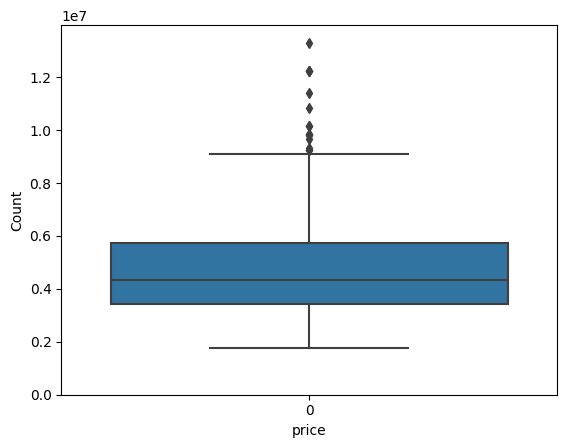

In [ ]:
import seaborn as sns

# Univariate analysis
sns.histplot(df['price'], kde=False)
sns.boxplot(df['price'])


<Axes: xlabel='bedrooms', ylabel='price'>

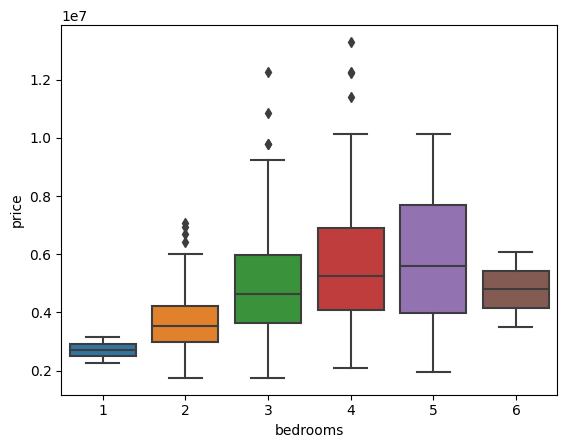

In [ ]:
# Bivariate analysis
sns.scatterplot(x='area', y='price', data=df)
sns.boxplot(x='bedrooms', y='price', data=df)

<ipython-input-4-eb8ff2228b32>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

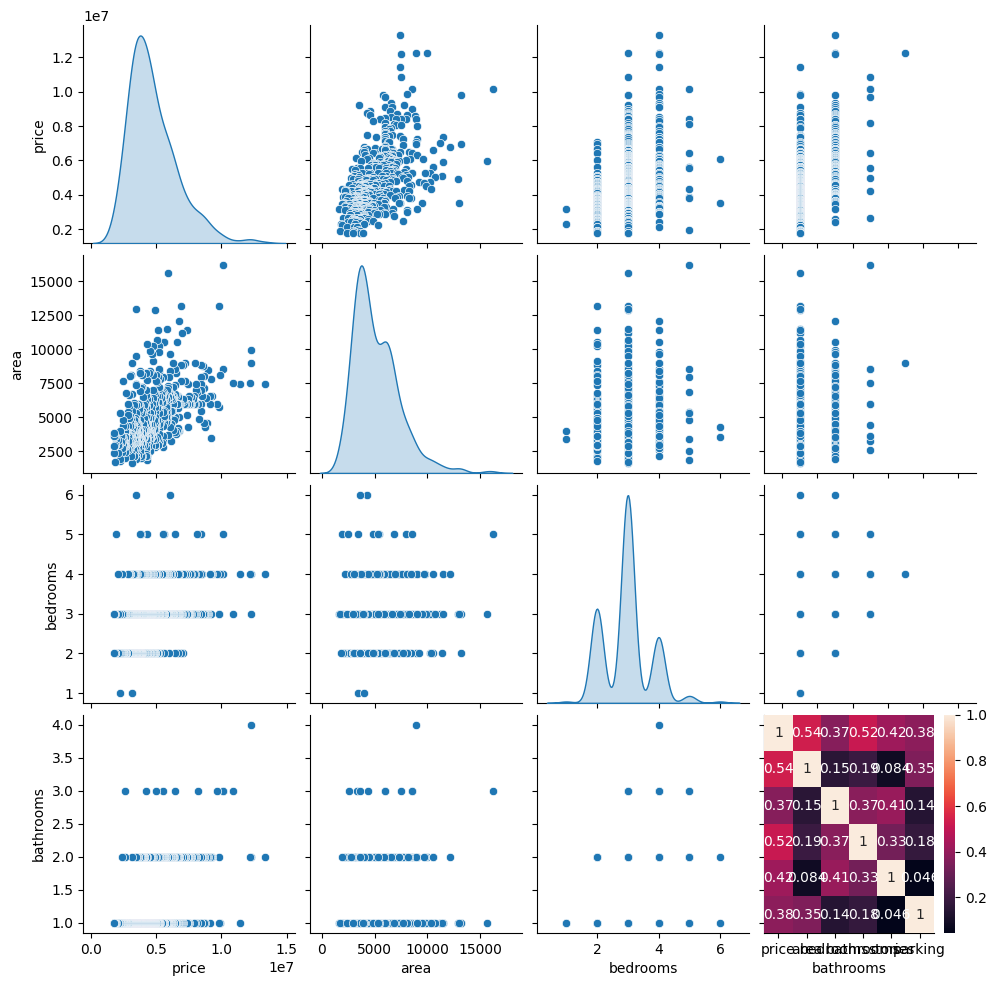

In [ ]:
# Multivariate analysis
sns.pairplot(df, vars=['price', 'area', 'bedrooms', 'bathrooms'], diag_kind='kde')
sns.heatmap(df.corr(), annot=True)

## **Perform descriptive statistics on the dataset.**

In [ ]:
# Descriptive statistics
stats = df.describe()
print(stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [ ]:
attributes = df.columns.tolist()
print(attributes)


['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'furnishingstatus']


## **Check for Missing values and deal with them.**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Deal with missing values
df.dropna(inplace=True)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


## **Find the outliers and replace them outliers**

In [ ]:
import numpy as np

# Calculate the IQR range for 'price'
Q1 = np.percentile(df['price'], 25)
Q3 = np.percentile(df['price'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("Outliers:\n", outliers)

# Replace outliers with the mean value of 'price'
mean_price = df['price'].mean()
df.loc[outliers.index, 'price'] = mean_price
print("Dataset after replacing outliers:\n", df)

Outliers:
         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000.0  6000         4          1        2      yes        no      yes   
16  9100000.0  6600         4          2        2      yes       yes      yes   
17  8960000.0  8500         3          2        4      yes        no       no   
18  8890000.0  4600         3          2        2      yes       yes       no   
19  8855000.0  6420         3          2        2      yes        no       no   

   hotwaterheating airconditioning  parking furnishingstatus  
15              no              no        2   semi-furnished  
16              no             yes        1      unfurnished  
17              no             yes        2        furnished  
18              no             yes        2        furnished  
19              no             yes        1   semi-furnished  
Dataset after replacing outliers:
             price  area  bedrooms  bathrooms  stories mainroad guestroom  \
0    4.766729

## **Check for Categorical columns and perform encoding.**

In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# Perform encoding (example: one-hot encoding)
encoded_df = pd.get_dummies(df, columns=categorical_columns)
print("Encoded DataFrame:\n", encoded_df)


Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
Encoded DataFrame:
             price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0    4.766729e+06  7420         4          2        3        2            0   
1    4.766729e+06  8960         4          4        4        3            0   
2    4.766729e+06  9960         3          2        2        2            0   
3    4.766729e+06  7500         4          2        2        3            0   
4    4.766729e+06  7420         4          1        2        2            0   
..            ...   ...       ...        ...      ...      ...          ...   
540  1.820000e+06  3000         2          1        1        2            0   
541  1.767150e+06  2400         3          1        1        0            1   
542  1.750000e+06  3620         2          1        1        0            0   
543  1.750000e+06  2910         3          1        1        0           

## **Split the data into dependent and independent variables.**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('price', axis=1)  # Features (all columns except 'price')
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (436, 11)
X_test shape: (109, 11)
y_train shape: (436,)
y_test shape: (109,)


In [ ]:
# Separate the dependent variable (target) and independent variables
X = df.drop('price', axis=1)  # Independent variables
y = df['price']  # Dependent variable
print("Independent variables (X):")
print(X.head())

print("\nDependent variable (y):")
print(y.head())


Independent variables (X):
   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420         4          2        3      yes        no       no   
1  8960         4          4        4      yes        no       no   
2  9960         3          2        2      yes        no      yes   
3  7500         4          2        2      yes        no      yes   
4  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  

Dependent variable (y):
0    4.766729e+06
1    4.766729e+06
2    4.766729e+06
3    4.766729e+06
4    4.766729e+06
Name: price, dtype: float64


## **Scale the independent variables**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Print the scaled data
print("Scaled training data:")
print(X_train_scaled)
print("\nScaled testing data:")
print(X_test_scaled)

Scaled training data:
[[ 0.38416819  0.05527092  1.53917323 ...  1.71111891 -0.870669
  -0.67690027]
 [ 0.9291807   0.05527092  1.53917323 ... -0.58441292  1.14854209
  -0.67690027]
 [-0.60775457 -1.28351359 -0.5579503  ...  1.71111891 -0.870669
  -0.67690027]
 ...
 [-0.29709744  0.05527092  1.53917323 ...  1.71111891 -0.870669
  -0.67690027]
 [-0.5060189  -1.28351359 -0.5579503  ... -0.58441292 -0.870669
   1.47732249]
 [ 0.15707965  0.05527092  1.53917323 ... -0.58441292  1.14854209
  -0.67690027]]

Scaled testing data:
[[ 0.33875048  1.39405543  1.53917323 ... -0.58441292 -0.870669
   1.47732249]
 [ 0.61125674  0.05527092  1.53917323 ...  1.71111891 -0.870669
  -0.67690027]
 [-0.5060189  -1.28351359 -0.5579503  ... -0.58441292  1.14854209
  -0.67690027]
 ...
 [ 0.38416819  1.39405543  1.53917323 ... -0.58441292  1.14854209
  -0.67690027]
 [ 0.38416819  0.05527092  1.53917323 ... -0.58441292  1.14854209
  -0.67690027]
 [ 0.4295859   0.05527092  1.53917323 ...  1.71111891 -0.870669
  

## **Split the data into training and testing**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set - Independent variables (X_train):")
print(X_train.head())

print("\nTraining set - Dependent variable (y_train):")
print(y_train.head())

print("\nTesting set - Independent variables (X_test):")
print(X_test.head())

print("\nTesting set - Dependent variable (y_test):")
print(y_test.head())


Training set - Independent variables (X_train):
     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
46   6000         3          2        4      yes        no       no   
93   7200         3          2        1      yes        no      yes   
335  3816         2          1        1      yes        no      yes   
412  2610         3          1        2      yes        no      yes   
471  3750         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking furnishingstatus  
46               no             yes        1        furnished  
93               no             yes        3   semi-furnished  
335              no             yes        2        furnished  
412              no              no        0      unfurnished  
471              no              no        0      unfurnished  

Training set - Dependent variable (y_train):
46     7525000.0
93     6300000.0
335    3920000.0
412    3430000.0
471    3010000.0
Name: pri